<a href="https://colab.research.google.com/github/EG-Kim/pytorch_example_01/blob/master/3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

로지스틱 회귀 Logistic Regression 는 집합의 각 원소의 확률을 계산하여 각 원소를 분류하는 데에 사용

로지스틱 회귀 분석에서는 확률 임계값을 결정하여 특정 요소의 확률이 확률 임계값보다 높으면 해당 요소를 한 그룹으로 분류하거나 그 반대로 분류

이미지 출처: https://www.analyticsvidhya.com/blog/2020/12/beginners-take-how-logistic-regression-is-related-to-linear-regression/

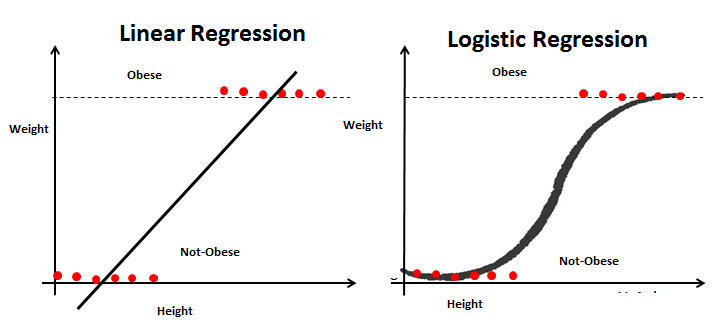

#### scikit-learn을 이용한 machine learning with MNIST

Linear SVM 이용한 분류

In [1]:
# 필요한 모듈 import
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#mnist data scikit-learn
mnist = fetch_openml('mnist_784', version=1)
print(list(mnist))
X, y = mnist['data'], mnist['target']

print("X shape", X.shape); print("y shape", y.shape)

['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url']
X shape (70000, 784)
y shape (70000,)


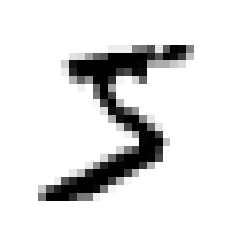

Answer= 5


In [3]:
sample=X[0]
sample = sample.reshape(28,28) # 28*28 = 784

plt.imshow(sample, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

print("Answer=", y[0])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [6]:
ls = LinearSVC(random_state=42)
ls.fit(X_train, y_train)

y_pred = ls.predict(X_train)
accuracy_score(y_train, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8953469387755102

In [7]:
y_pred = ls.predict(X_test)
accuracy_score(y_test, y_pred)

0.8765714285714286

Random Forest 이용한 분류

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_pred = ls.predict(X_train)
accuracy_score(y_train, y_pred)

In [ ]:
y_pred = ls.predict(X_test)
accuracy_score(y_test, y_pred)

## **Logistic Regression with MNIST dataset**

#### 모듈 불러오기

In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

#### 파라메터 설정

In [9]:
# Hyper-parameters
input_size = 784 # 이미지 크기가 28*28 = 784
num_classes = 10 # 숫자 데이터 0-9 까지 10개의 class
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### MNIST 데이터셋으로 데이터로더 구성

In [10]:
# 숫자 데이터 MNIST torchvision에서 제공해주는 것 download
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline). DataLoader라는 class에서 한번 훈련집합에서 뽑아올 때 100장씩.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True) # 데이터 순서 섞기: True로 하면 뽑아올 때마다 배뀜. 배치마다 다른 순서로 훈련.

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) # 테스트할 때는 학습을 진행하지 않기 때문에 순서를 섞지 않음(섞든 말든 의미 없음)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### 데이터 확인

In [11]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [12]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next() # train loader에서 데이터 한 세트 가져오기 -> data loader에서는 입력값, 정답을 한 세트로 취급
print(images.shape) # 입력값의 모양. batch size(한번 뽑아낼 때 100장. 100장을 한번에 훈련), 1, 이미지 사이즈 28, 28

torch.Size([100, 1, 28, 28])


In [13]:
print(images[0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

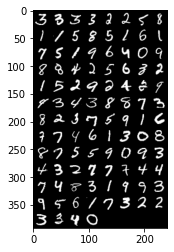

tensor([3, 3, 3, 3, 2, 2, 5, 8, 1, 1, 5, 8, 5, 1, 6, 1, 7, 5, 1, 9, 6, 4, 0, 9,
        8, 8, 4, 2, 5, 6, 3, 2, 1, 5, 2, 9, 2, 4, 2, 9, 4, 3, 4, 3, 8, 8, 7, 3,
        8, 2, 3, 7, 5, 9, 1, 6, 7, 7, 4, 6, 1, 3, 0, 8, 8, 7, 5, 5, 9, 0, 9, 3,
        4, 3, 2, 7, 7, 7, 4, 4, 7, 4, 8, 3, 1, 9, 9, 3, 9, 5, 6, 1, 7, 3, 2, 2,
        3, 3, 4, 0])


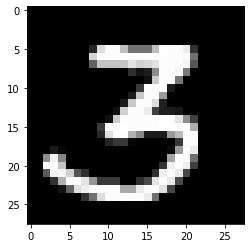

tensor(3)


In [18]:
# functions to show an image. 이미지를 보여주는 함수를 plt 라이브러리 이용하여 만들기
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # 이미지 변환
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images. 전체 100장의 배치에 대해 이미지 출력
imshow(torchvision.utils.make_grid(images))
# print labels
print(labels)

imshow(torchvision.utils.make_grid(images[0])) # 전체 100장의 배치 가운데 처음 한 장
print(labels[0])

#### Logistic regression model

torch.nn.Linear 클래스 사용. 전체가 연결된 완전 연결 층
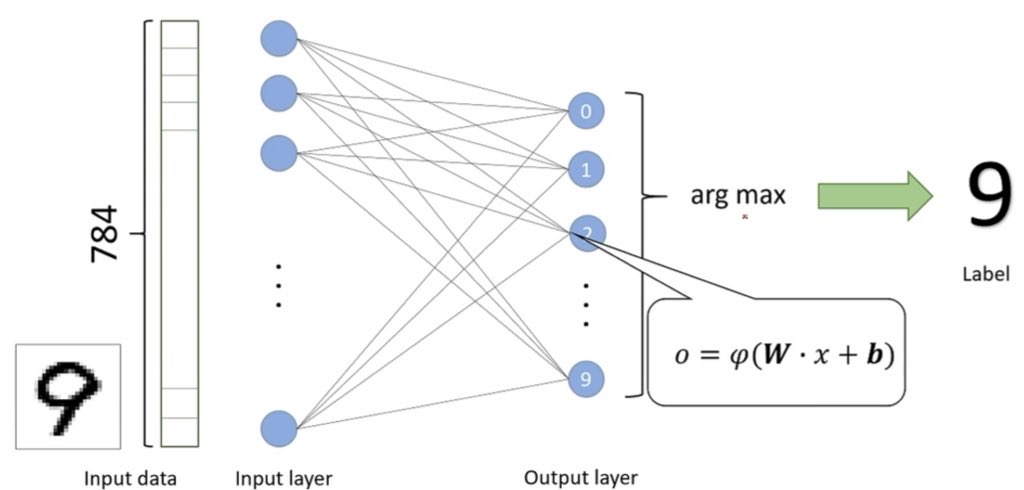

In [20]:
model = nn.Linear(input_size, num_classes)

#### Loss and optimizer


In [21]:
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

#### Train the model

In [22]:
total_step = len(train_loader)
loss_values = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader): # train loader에서는 image와 label이 세트. enumerate를 이용하면 index의 원소와 collection의 원소를 같이 반환
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28) # 1자로 펴서 100, 784로. -1이면 그 부분은 알아서 변환
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad() # tensor의 미분값 0으로 초기화
        loss.backward() # 미분
        optimizer.step() # 가중치 갱신
        
        loss_values.append(loss.item()) # loss 값을 loss_values의 배열에 추가. 한 배치 100장에 대한 loss.
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 2.2430
Epoch [1/5], Step [200/600], Loss: 2.1129
Epoch [1/5], Step [300/600], Loss: 2.0143
Epoch [1/5], Step [400/600], Loss: 1.9214
Epoch [1/5], Step [500/600], Loss: 1.8408
Epoch [1/5], Step [600/600], Loss: 1.8085
Epoch [2/5], Step [100/600], Loss: 1.7782
Epoch [2/5], Step [200/600], Loss: 1.6749
Epoch [2/5], Step [300/600], Loss: 1.6137
Epoch [2/5], Step [400/600], Loss: 1.6154
Epoch [2/5], Step [500/600], Loss: 1.5804
Epoch [2/5], Step [600/600], Loss: 1.5106
Epoch [3/5], Step [100/600], Loss: 1.4431
Epoch [3/5], Step [200/600], Loss: 1.3309
Epoch [3/5], Step [300/600], Loss: 1.3773
Epoch [3/5], Step [400/600], Loss: 1.3011
Epoch [3/5], Step [500/600], Loss: 1.3255
Epoch [3/5], Step [600/600], Loss: 1.2407
Epoch [4/5], Step [100/600], Loss: 1.2908
Epoch [4/5], Step [200/600], Loss: 1.1843
Epoch [4/5], Step [300/600], Loss: 1.1578
Epoch [4/5], Step [400/600], Loss: 1.1098
Epoch [4/5], Step [500/600], Loss: 1.0507
Epoch [4/5], Step [600/600], Loss:

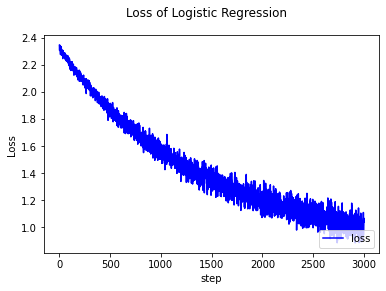

In [23]:
#학습 그래프 출력

fig, loss_ax = plt.subplots()

loss_ax.plot(loss_values, 'b', label='loss',  fillstyle='none')

loss_ax.set_xlabel('step')
loss_ax.set_ylabel('Loss')
fig.suptitle('Loss of Logistic Regression')

loss_ax.legend(loc='lower right')


plt.show()

#### Test the model

In [ ]:
# 가중치 갱신 필요 X. 미분 계산 X. 모델에 넣어서 결과만 확인.
# In test phase, we don't need to compute gradients (for memory efficiency). 미분 구하지 않게.
with torch.no_grad():
    # get some random testing images
    dataiter = iter(test_loader)
    images, labels = dataiter.next() # 100장 꺼내오기

    # show images
    imshow(torchvision.utils.make_grid(images))
    
    images = images.reshape(-1, 28*28)
    outputs = model(images) # label 0-9까지. 가장 높은 점수를 가진 예측값
    
    _, predicted = torch.max(outputs.data, 1)
    
    # print labels
    print("ground truth: ", labels)
    print("predicted: ", predicted)

In [ ]:
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum() # test image 10000장에 대한 비교

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct.item() / total))